# Python visualization

# Agenda

* Plotting from pandas
* Matplotlib basics
* Python visualization alternatives
    - Matplotlib
    - Plotly
    - Bokeh
    - Altair
    - Seaborn
    - ...
* Visualization distribution options

# Setup

`$ pip install vega_datasets`

In [1]:
from vega_datasets import data
import pandas as pd

# Plotting from pandas

By default plotting directly from pandas used [matplotlib](https://matplotlib.org/) as the plotting backend  
The [Visualization Chapter](https://pandas.pydata.org/docs/user_guide/visualization.html#) of the pandas User Guide gives a good overview  
In the [Cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#plotting) section of the pandas docs there is a section around Visualization techniques

In [2]:
data.cars()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0    chevrolet chevelle malibu              18.0          8         307.0   
1            buick skylark 320              15.0          8         350.0   
2           plymouth satellite              18.0          8         318.0   
3                amc rebel sst              16.0          8         304.0   
4                  ford torino              17.0          8         302.0   
..                         ...               ...        ...           ...   
401            ford mustang gl              27.0          4         140.0   
402                  vw pickup              44.0          4          97.0   
403              dodge rampage              32.0          4         135.0   
404                ford ranger              28.0          4         120.0   
405                 chevy s-10              31.0          4         119.0   

     Horsepower  Weight_in_lbs  Acceleration       Year  Origin  
0         130.0           3504          12.0 1970-01-01     USA  
1         165.0           3693          11.5 1970-01-01     USA  
2         150.0           3436          11.0 1970-01-01     USA  
3         150.0           3433          12.0 1970-01-01     USA  
4         140.0           3449          10.5 1970-01-01     USA  
..          ...            ...           ...        ...     ...  
401        86.0           2790          15.6 1982-01-01     USA  
402        52.0           2130          24.6 1982-01-01  Europe  
403        84.0           2295          11.6 1982-01-01     USA  
404        79.0           2625          18.6 1982-01-01     USA  
405        82.0           2720          19.4 1982-01-01     USA  

[406 rows x 9 columns]

In [118]:
data.airports()
data.stocks()
data.iris()

sepalLength  sepalWidth  petalLength  petalWidth    species
0            5.1         3.5          1.4         0.2     setosa
1            4.9         3.0          1.4         0.2     setosa
2            4.7         3.2          1.3         0.2     setosa
3            4.6         3.1          1.5         0.2     setosa
4            5.0         3.6          1.4         0.2     setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  virginica
146          6.3         2.5          5.0         1.9  virginica
147          6.5         3.0          5.2         2.0  virginica
148          6.2         3.4          5.4         2.3  virginica
149          5.9         3.0          5.1         1.8  virginica

[150 rows x 5 columns]

In [119]:
df = data.stocks()

In [120]:
df.head()

symbol       date  price
0   MSFT 2000-01-01  39.81
1   MSFT 2000-02-01  36.35
2   MSFT 2000-03-01  43.22
3   MSFT 2000-04-01  28.37
4   MSFT 2000-05-01  25.45

In [121]:
df.symbol.value_counts()

AMZN    123
MSFT    123
AAPL    123
IBM     123
GOOG     68
Name: symbol, dtype: int64

## Plot individual stock

<AxesSubplot:xlabel='date'>

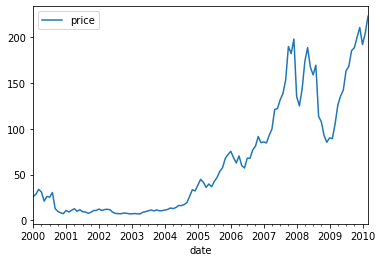

In [122]:
df.loc[df.symbol=='AAPL'].plot(x='date',y='price')

### Adjust plotsize

<AxesSubplot:xlabel='date'>

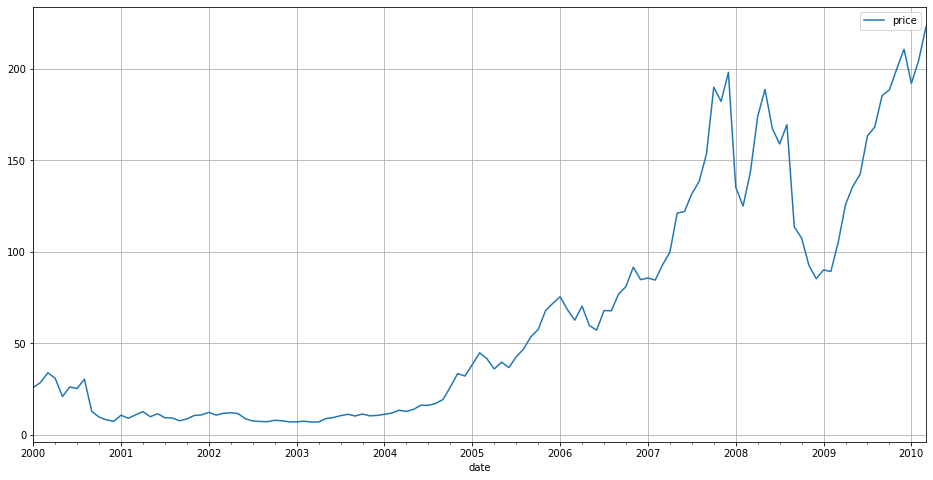

In [123]:
df.loc[df.symbol=='AAPL'].plot(x='date',y='price', figsize=(16,8), grid=True)

### Re-structure data to plot all categories (stocks)

In [10]:
df_pivot =  df.pivot(index='date', columns='symbol', values='price')

In [11]:
df_pivot

symbol        AAPL    AMZN    GOOG     IBM   MSFT
date                                             
2000-01-01   25.94   64.56     NaN  100.52  39.81
2000-02-01   28.66   68.87     NaN   92.11  36.35
2000-03-01   33.95   67.00     NaN  106.11  43.22
2000-04-01   31.01   55.19     NaN   99.95  28.37
2000-05-01   21.00   48.31     NaN   96.31  25.45
...            ...     ...     ...     ...    ...
2009-11-01  199.91  135.91  583.00  125.79  29.27
2009-12-01  210.73  134.52  619.98  130.32  30.34
2010-01-01  192.06  125.41  529.94  121.85  28.05
2010-02-01  204.62  118.40  526.80  127.16  28.67
2010-03-01  223.02  128.82  560.19  125.55  28.80

[123 rows x 5 columns]

<AxesSubplot:xlabel='date'>

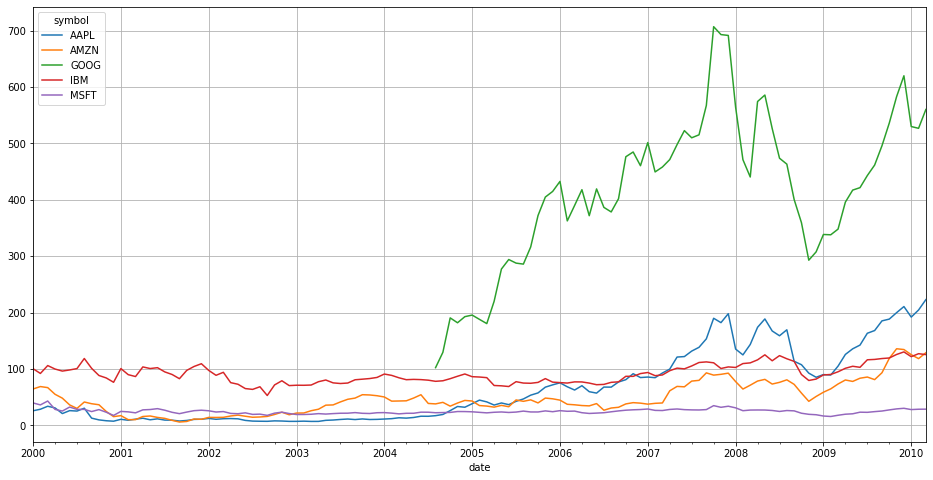

In [12]:
df_pivot.plot(figsize=(16,8), grid=True)

## Series plotting

In [13]:
df_cars = data.cars()

In [14]:
df_cars.head()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA  
3       150.0           3433          12.0 1970-01-01    USA  
4       140.0           3449          10.5 1970-01-01    USA

In [15]:
pd.set_option("plotting.backend", 'matplotlib')

<AxesSubplot:ylabel='Frequency'>

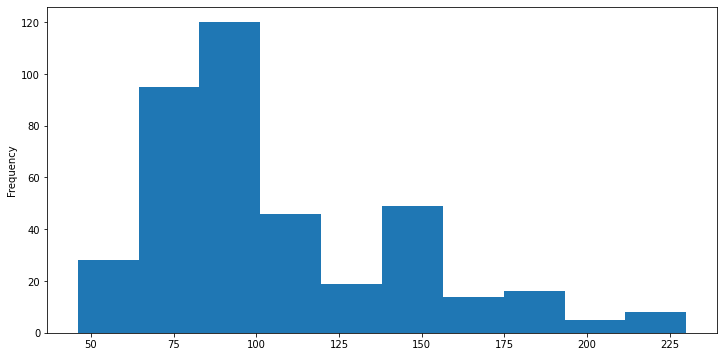

In [16]:
df_cars.Horsepower.plot.hist(figsize=(12,6))

In [17]:
type(_)

matplotlib.axes._subplots.AxesSubplot

In [18]:
df_cars_by_origin = df_cars.groupby('Origin').mean()
df_cars_by_origin

Miles_per_Gallon  Cylinders  Displacement  Horsepower  Weight_in_lbs  \
Origin                                                                         
Europe         27.891429   4.150685    109.465753   81.000000    2431.493151   
Japan          30.450633   4.101266    102.708861   79.835443    2221.227848   
USA            20.083534   6.283465    247.935039  119.900000    3372.700787   

        Acceleration  
Origin                
Europe     16.821918  
Japan      16.172152  
USA        14.942520

<AxesSubplot:title={'center':'Horsepower'}, ylabel='Origin'>

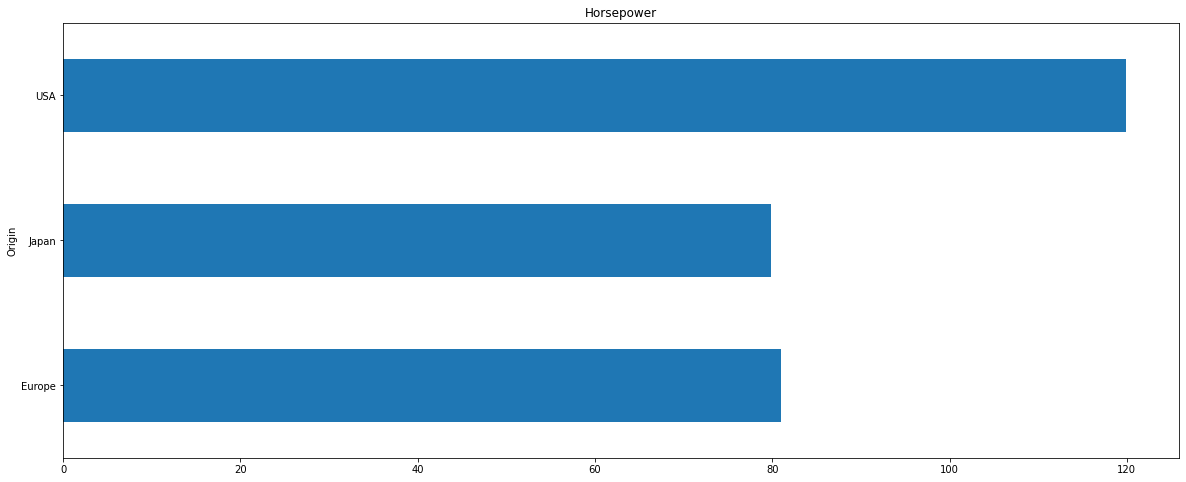

In [19]:

df_cars_by_origin.loc[:,'Horsepower'].plot.barh(figsize=(20,8), title='Horsepower')

## pandas plotting tools

In [20]:
from pandas.plotting import scatter_matrix

### Scatter matrix

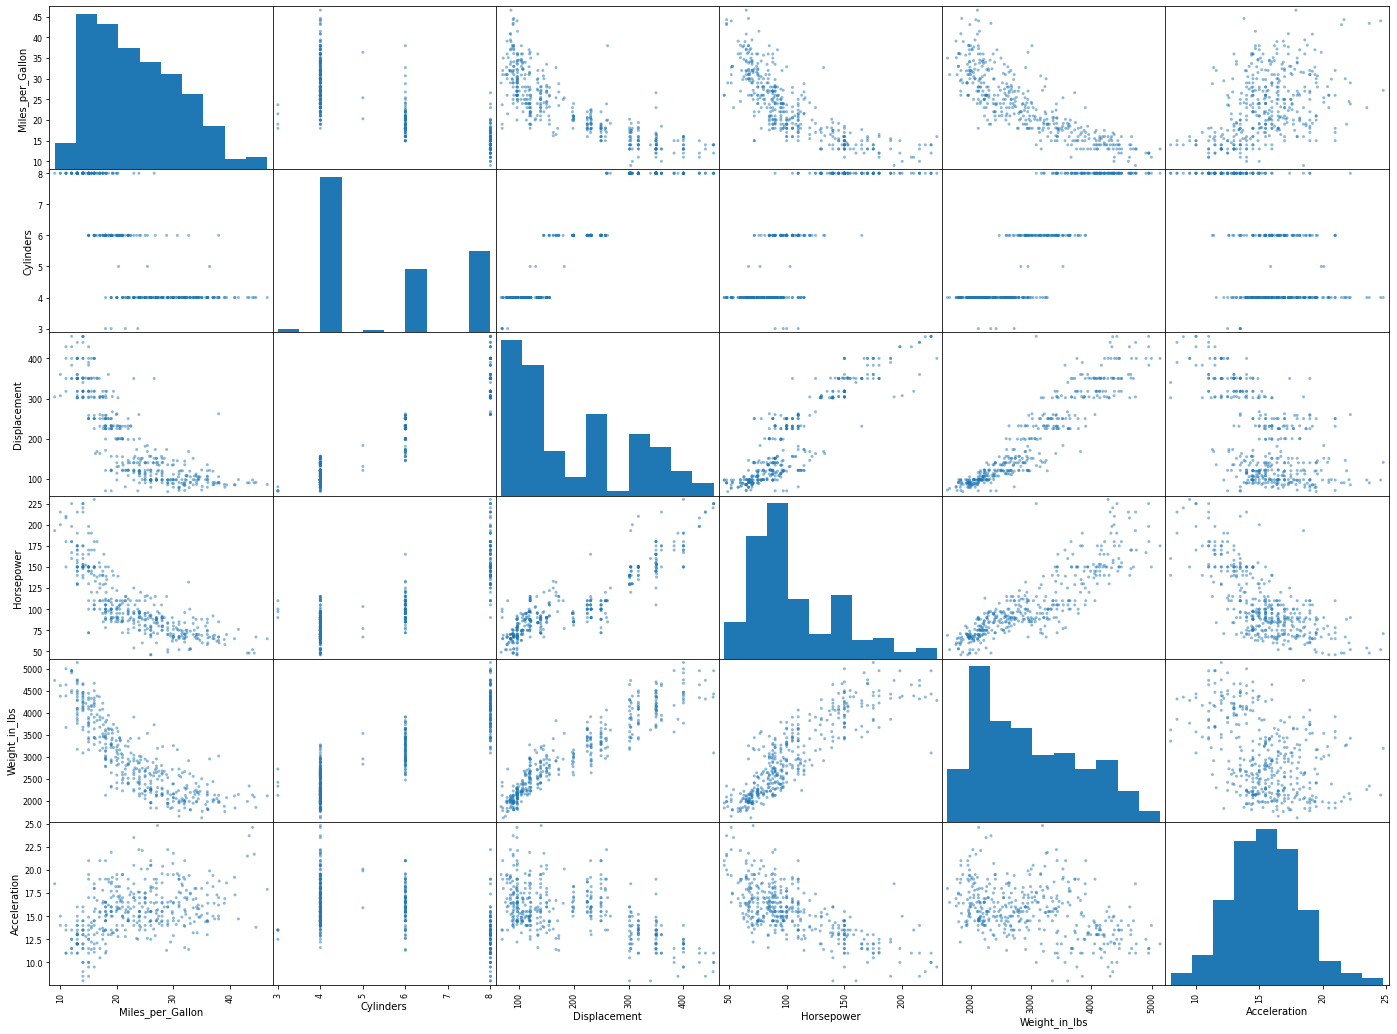

In [21]:
_ = scatter_matrix(df_cars, figsize=(24,18))

In [22]:
df_cars['make_year'] = df_cars.Year.dt.year

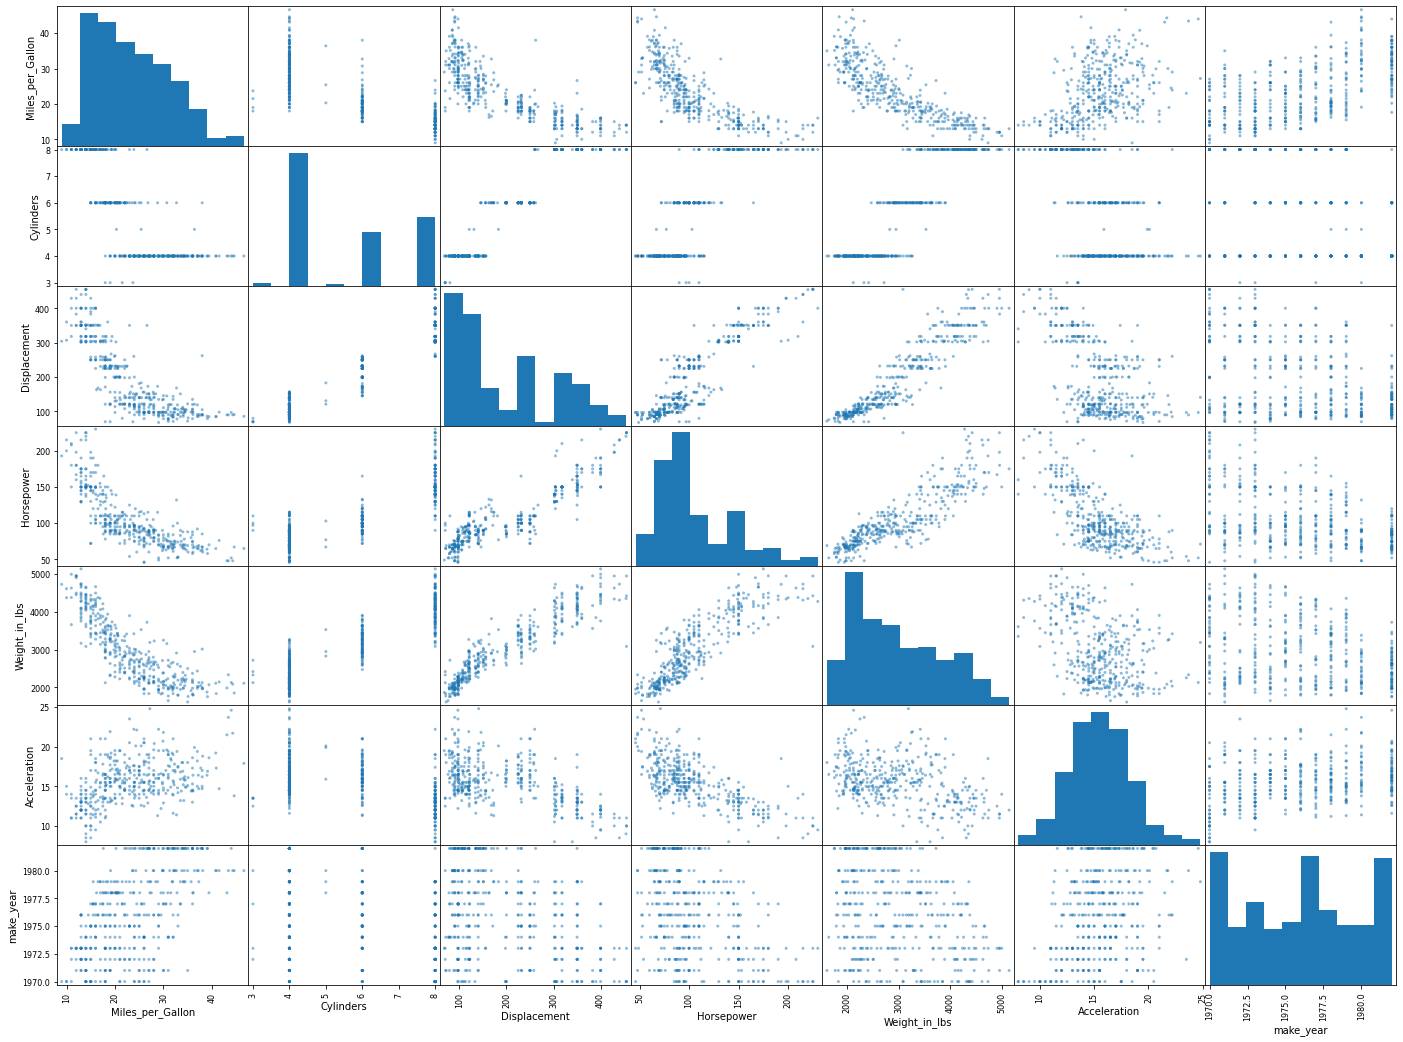

In [23]:
_ = scatter_matrix(df_cars, figsize=(24,18))

## Pandas visualization ecosystem

https://pandas.pydata.org/docs/ecosystem.html#visualization

# Matplotlib Basics

* Extensive documentation available at: https://matplotlib.org/

**Pros**
* Easy to get started
* Powerful
* Almost every aspect of plot is configurable
* Plenty of examples and good documentation available
* Used for long time by many --> Most problems/questions have answers on StackOverflow etc.

**Cons**
* 2 APIs "Pyplot" and Object-oriented, need to choose and/or be aware of difference
* Pyplot API can be a bit confusing (from beginning built to mimic MATLAB)
* Main target output is static images (interacivity is possible)

In [49]:
import matplotlib.pyplot as plt
from vega_datasets import data
import pandas as pd

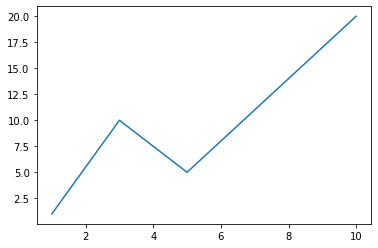

In [7]:
x = [1,3,5,10]
y = [1,10,5,20]

plt.plot(x,y)

In [8]:
df_stocks = data.stocks()
df_stocks.head()

symbol       date  price
0   MSFT 2000-01-01  39.81
1   MSFT 2000-02-01  36.35
2   MSFT 2000-03-01  43.22
3   MSFT 2000-04-01  28.37
4   MSFT 2000-05-01  25.45

In [9]:
df_tmp = df_stocks[df_stocks.symbol=='MSFT']
x = df_tmp.date
y = df_tmp.price

## Pyplot API (built to mimic MATLAB)

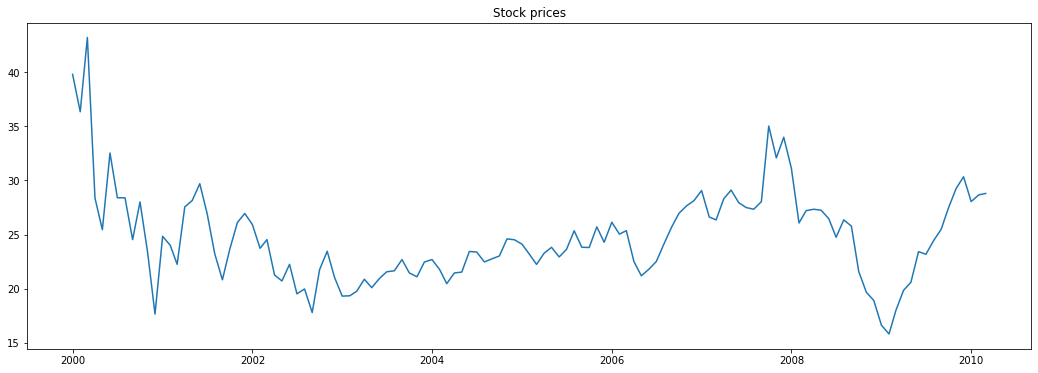

In [10]:
plt.figure(figsize=(18,6))
plt.plot(x,y)
_ = plt.title('Stock prices')


The Pyplot API has the concept of "currently active" figure and axes  
This can be convinient for simple cases, but makes things confusing for more complex plots

## Object-oriented API (recommended)

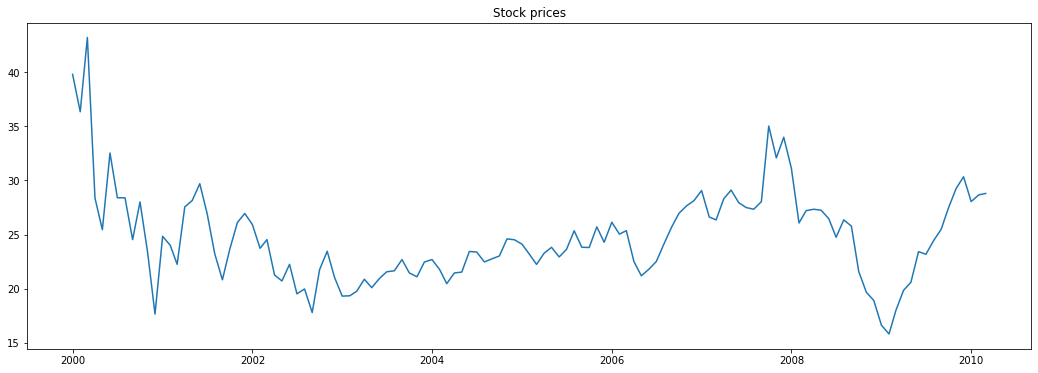

In [11]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(x,y)
_ = ax.set_title('Stock prices')

## Multiple lines in same plot

In [12]:
df_stocks = data.stocks()
df_stocks

symbol       date   price
0     MSFT 2000-01-01   39.81
1     MSFT 2000-02-01   36.35
2     MSFT 2000-03-01   43.22
3     MSFT 2000-04-01   28.37
4     MSFT 2000-05-01   25.45
..     ...        ...     ...
555   AAPL 2009-11-01  199.91
556   AAPL 2009-12-01  210.73
557   AAPL 2010-01-01  192.06
558   AAPL 2010-02-01  204.62
559   AAPL 2010-03-01  223.02

[560 rows x 3 columns]

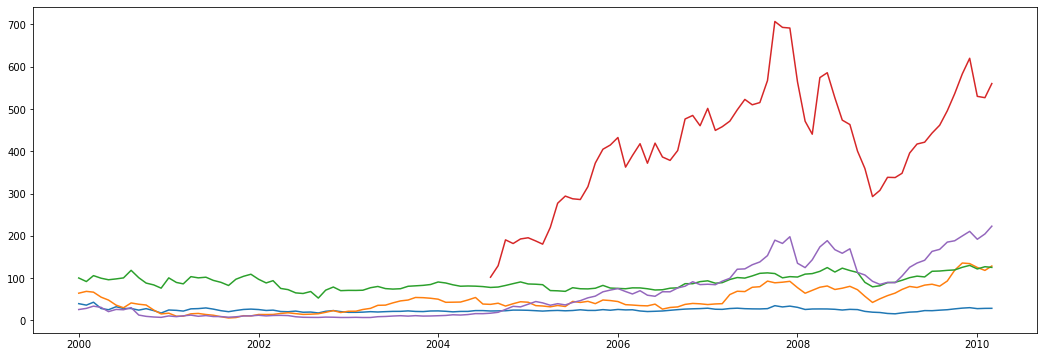

In [13]:
fig, ax = plt.subplots(figsize=(18,6))

for symbol in df_stocks.symbol.unique():
    df_tmp = df_stocks[df_stocks.symbol==symbol]
    ax.plot(df_tmp.date, df_tmp.price)



## Subplots

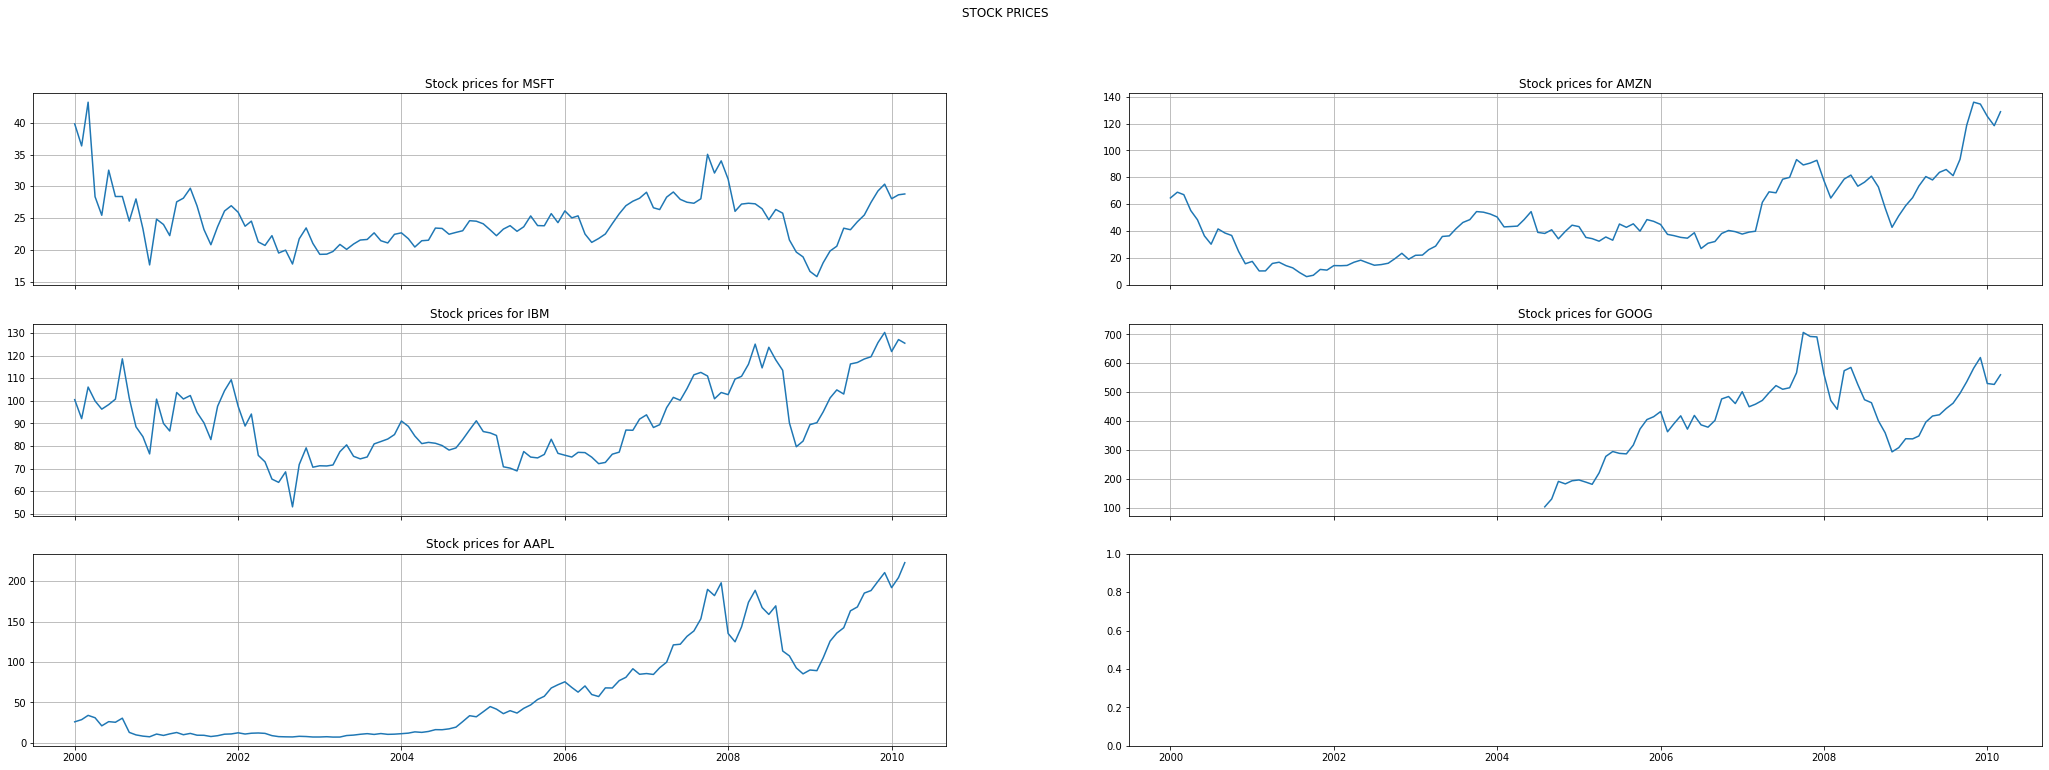

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(36,12), sharex=True)
axs = axs.flatten()

for i, symbol in enumerate(df_stocks.symbol.unique()):
    df_tmp = df_stocks[df_stocks.symbol==symbol]
    ax = axs[i]
    ax.plot(df_tmp.date, df_tmp.price)
    ax.set_title(f'Stock prices for {symbol}')
    ax.grid(True)

_ = fig.suptitle('STOCK PRICES')    

## Scatter plot

In [15]:
df_stocks = data.stocks()
df_stocks

symbol       date   price
0     MSFT 2000-01-01   39.81
1     MSFT 2000-02-01   36.35
2     MSFT 2000-03-01   43.22
3     MSFT 2000-04-01   28.37
4     MSFT 2000-05-01   25.45
..     ...        ...     ...
555   AAPL 2009-11-01  199.91
556   AAPL 2009-12-01  210.73
557   AAPL 2010-01-01  192.06
558   AAPL 2010-02-01  204.62
559   AAPL 2010-03-01  223.02

[560 rows x 3 columns]

In [118]:
df_tmp = df_stocks.pivot(index='date', columns='symbol', values='price')

df_tmp

symbol        AAPL    AMZN    GOOG     IBM   MSFT
date                                             
2000-01-01   25.94   64.56     NaN  100.52  39.81
2000-02-01   28.66   68.87     NaN   92.11  36.35
2000-03-01   33.95   67.00     NaN  106.11  43.22
2000-04-01   31.01   55.19     NaN   99.95  28.37
2000-05-01   21.00   48.31     NaN   96.31  25.45
...            ...     ...     ...     ...    ...
2009-11-01  199.91  135.91  583.00  125.79  29.27
2009-12-01  210.73  134.52  619.98  130.32  30.34
2010-01-01  192.06  125.41  529.94  121.85  28.05
2010-02-01  204.62  118.40  526.80  127.16  28.67
2010-03-01  223.02  128.82  560.19  125.55  28.80

[123 rows x 5 columns]

In [147]:
def get_yield(periods):
    df_diff = df_tmp.diff(periods=periods)
    return df_diff.div(df_tmp.shift(periods), axis='columns')

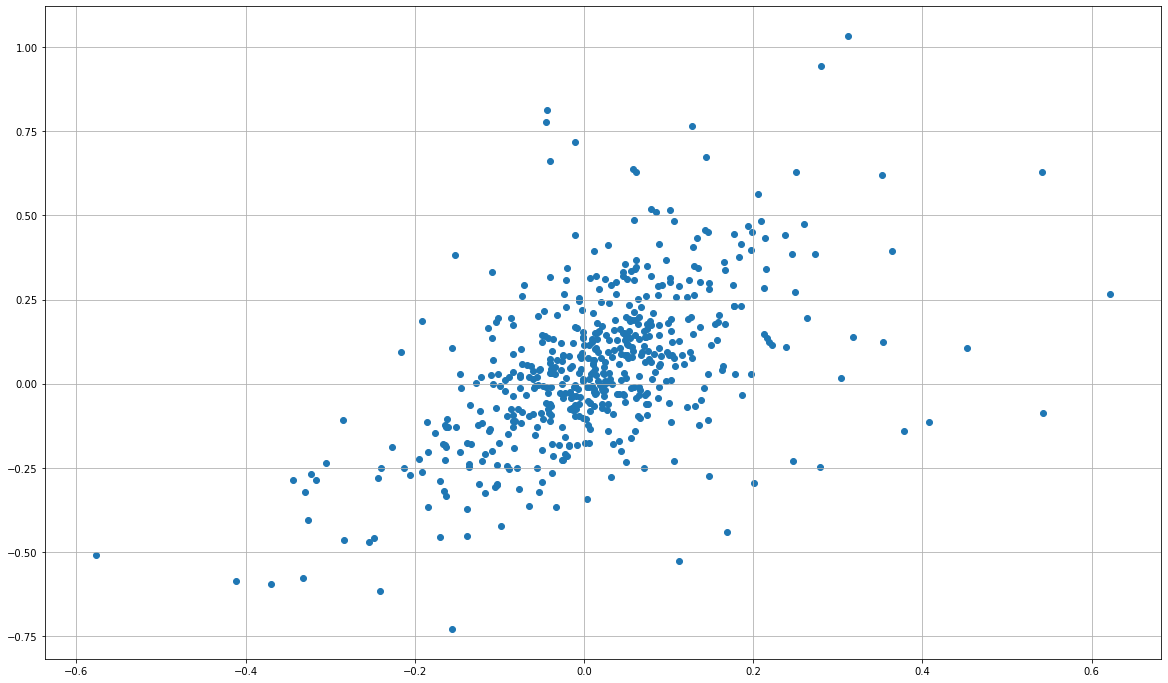

In [153]:
fig, ax = plt.subplots(figsize=(20,12))

ax.scatter(x=get_yield(periods=1).values.flatten(), y=get_yield(periods=3).values.flatten())
ax.grid(True)

In [144]:
df_diff = df_tmp.diff(periods=1)
df_diff

symbol       AAPL   AMZN   GOOG    IBM   MSFT
date                                         
2000-01-01    NaN    NaN    NaN    NaN    NaN
2000-02-01   2.72   4.31    NaN  -8.41  -3.46
2000-03-01   5.29  -1.87    NaN  14.00   6.87
2000-04-01  -2.94 -11.81    NaN  -6.16 -14.85
2000-05-01 -10.01  -6.88    NaN  -3.64  -2.92
...           ...    ...    ...    ...    ...
2009-11-01  11.41  17.10  46.88   6.25   1.79
2009-12-01  10.82  -1.39  36.98   4.53   1.07
2010-01-01 -18.67  -9.11 -90.04  -8.47  -2.29
2010-02-01  12.56  -7.01  -3.14   5.31   0.62
2010-03-01  18.40  10.42  33.39  -1.61   0.13

[123 rows x 5 columns]

In [146]:
df_monthly_yield = df_diff.div(df_tmp.shift(1), axis='columns')
df_monthly_yield

symbol          AAPL      AMZN      GOOG       IBM      MSFT
date                                                        
2000-01-01       NaN       NaN       NaN       NaN       NaN
2000-02-01  0.104857  0.066760       NaN -0.083665 -0.086913
2000-03-01  0.184578 -0.027153       NaN  0.151992  0.188996
2000-04-01 -0.086598 -0.176269       NaN -0.058053 -0.343591
2000-05-01 -0.322799 -0.124660       NaN -0.036418 -0.102926
...              ...       ...       ...       ...       ...
2009-11-01  0.060531  0.143927  0.087443  0.052284  0.065138
2009-12-01  0.054124 -0.010227  0.063431  0.036012  0.036556
2010-01-01 -0.088597 -0.067722 -0.145230 -0.064994 -0.075478
2010-02-01  0.065396 -0.055897 -0.005925  0.043578  0.022103
2010-03-01  0.089923  0.088007  0.063383 -0.012661  0.004534

[123 rows x 5 columns]

In [128]:
2.72 / 0.094906

28.659937201019957

In [137]:
df_tmp.shift(-1)

symbol        AAPL    AMZN    GOOG     IBM   MSFT
date                                             
2000-01-01   28.66   68.87     NaN   92.11  36.35
2000-02-01   33.95   67.00     NaN  106.11  43.22
2000-03-01   31.01   55.19     NaN   99.95  28.37
2000-04-01   21.00   48.31     NaN   96.31  25.45
2000-05-01   26.19   36.31     NaN   98.33  32.54
...            ...     ...     ...     ...    ...
2009-11-01  210.73  134.52  619.98  130.32  30.34
2009-12-01  192.06  125.41  529.94  121.85  28.05
2010-01-01  204.62  118.40  526.80  127.16  28.67
2010-02-01  223.02  128.82  560.19  125.55  28.80
2010-03-01     NaN     NaN     NaN     NaN    NaN

[123 rows x 5 columns]

## Mix of plot types

In [16]:
df_cars = data.cars()
df_cars.head()

Name  Miles_per_Gallon  Cylinders  Displacement  \
0  chevrolet chevelle malibu              18.0          8         307.0   
1          buick skylark 320              15.0          8         350.0   
2         plymouth satellite              18.0          8         318.0   
3              amc rebel sst              16.0          8         304.0   
4                ford torino              17.0          8         302.0   

   Horsepower  Weight_in_lbs  Acceleration       Year Origin  
0       130.0           3504          12.0 1970-01-01    USA  
1       165.0           3693          11.5 1970-01-01    USA  
2       150.0           3436          11.0 1970-01-01    USA  
3       150.0           3433          12.0 1970-01-01    USA  
4       140.0           3449          10.5 1970-01-01    USA

In [ ]:
cm.ScalarMappable(norm=)

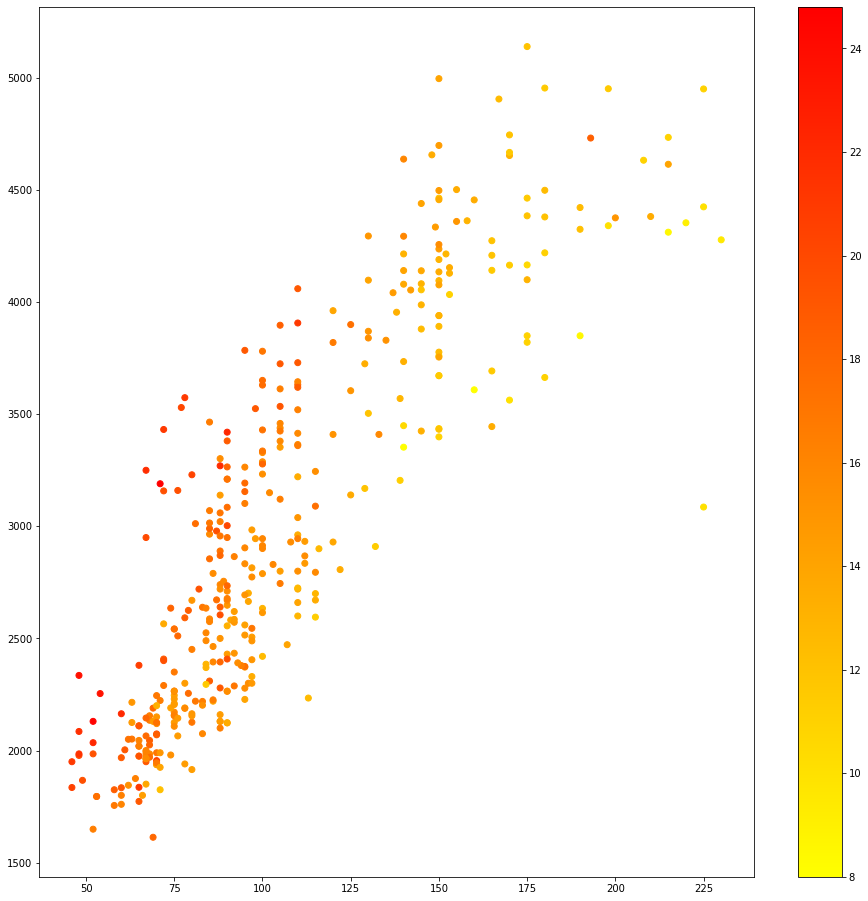

In [112]:
fig,ax = plt.subplots(figsize=(16,16))
s = ax.scatter(x=df_cars.Horsepower, y=df_cars.Weight_in_lbs, c=df_cars.Acceleration, cmap=cm.autumn_r)
#fig.colorbar(cm.ScalarMappable(),ax=ax)
plt.colorbar(s)

In [17]:
from matplotlib import cm
from cycler import cycler

In [18]:
color_cycle = cycler(c=['r', 'g', 'b'])

In [19]:
color_cycle()

In [20]:
colmap = cm.get_cmap(lut=5)

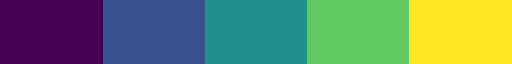

In [21]:
colmap

In [23]:
colors = {key:colmap(i) for i,key in enumerate(df_cars.Origin.unique())}

In [63]:
df_cylinder_plot = df_cars.groupby(['Origin','Cylinders']).count().iloc[:,0].reset_index().rename({'Name':'car_count'}, axis=1)
df_cylinder_plot

Origin  Cylinders  car_count
0  Europe          4         66
1  Europe          5          3
2  Europe          6          4
3   Japan          3          4
4   Japan          4         69
5   Japan          6          6
6     USA          4         72
7     USA          6         74
8     USA          8        108

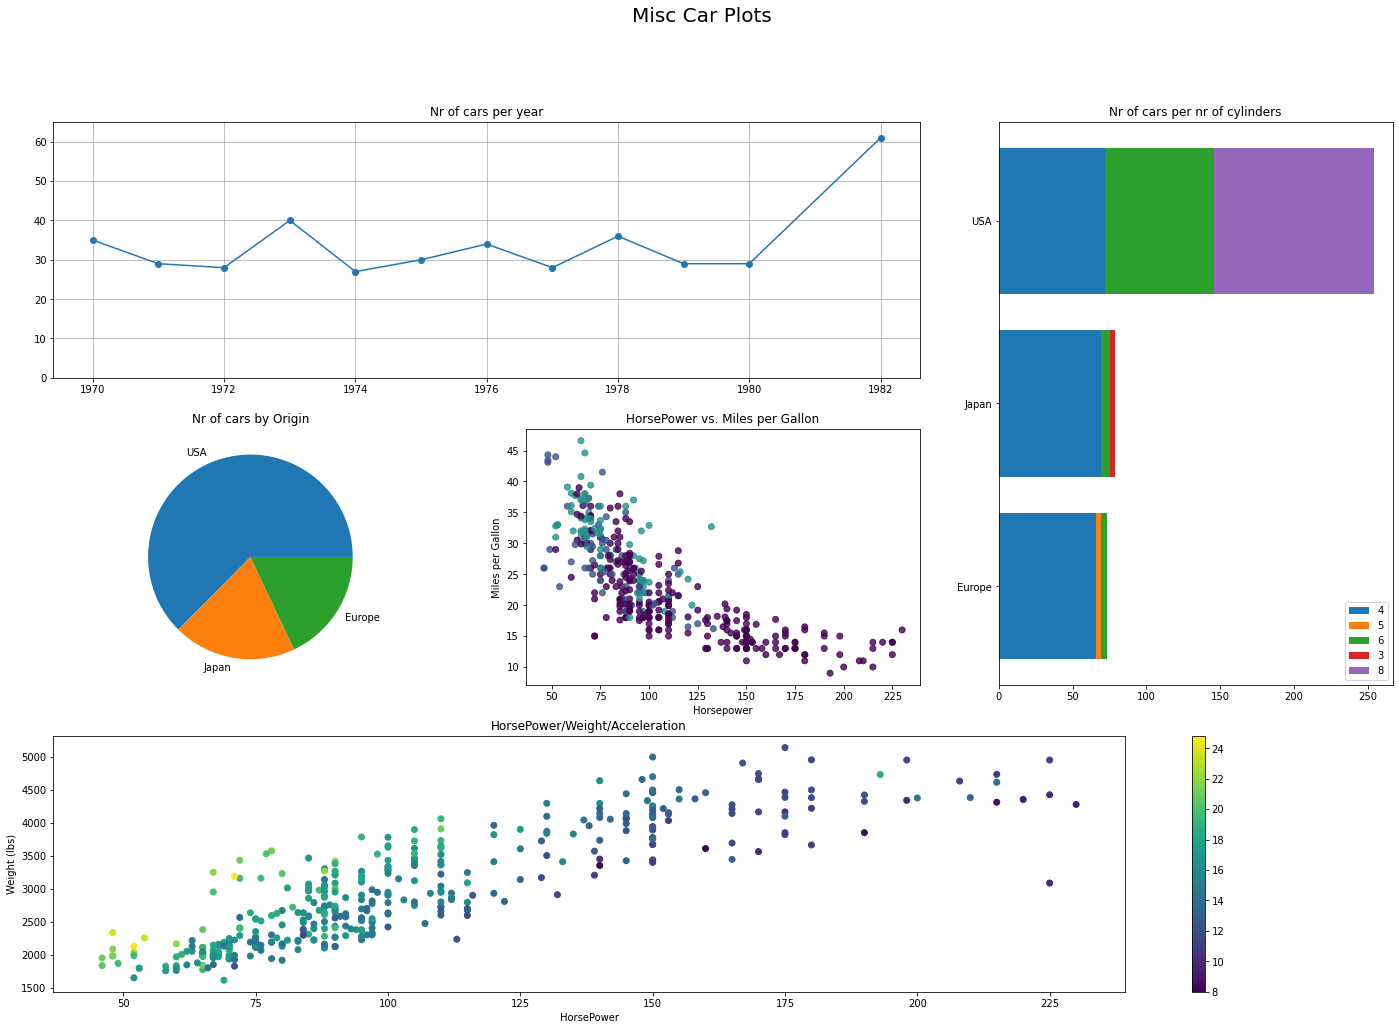

In [117]:
lo = '''
    AAD
    BCD
    ZZZ
'''

fig, axs = plt.subplot_mosaic(layout = lo, figsize=(24,16))

# Nr of cars per year
ax = axs['A']
df_by_year = df_cars.groupby('Year').count().iloc[:,0].reset_index().rename({'Name':'car_count'}, axis=1)
ax.plot(df_by_year.Year, df_by_year.car_count, '-o')
ax.set_ylim((0,65))
ax.grid(True)
ax.set_title('Nr of cars per year')

# Cars by origin pie-chart
ax = axs['B']
ax.pie(df_cars.Origin.value_counts(), labels=df_cars.Origin.value_counts().index)
ax.set_title('Nr of cars by Origin')

# Scatter-chart horse-power vs. Miles per Gallon
ax = axs['C']
ax.scatter(df_cars.Horsepower,df_cars.Miles_per_Gallon,label=df_cars.Origin ,c=df_cars.Origin.map(colors), alpha=0.8)
ax.set_title('HorsePower vs. Miles per Gallon')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per Gallon')


# Plot bar-chart per cylinder count
ax = axs['D']
df_cylinder_plot = df_cars.groupby(['Origin','Cylinders']).count().iloc[:,0].reset_index().rename({'Name':'car_count'}, axis=1)

# Make sure we have values for every combination of Origin + Cyliners
mi = pd.MultiIndex.from_product([df_cylinder_plot.Origin.unique(), df_cylinder_plot.Cylinders.unique()], names=['Origin','Cylinders'])
df_cylinder_plot = df_cylinder_plot.set_index(['Origin','Cylinders']).reindex(mi, fill_value=0).reset_index()

# iterate over each cylinder_count, and add to plot, taking into account to stack the plot by starting bars where last iteration ended with "left=cyl" parameter
prev_end = 0
for cyl in df_cylinder_plot.Cylinders.unique():
    df_tmp = df_cylinder_plot[df_cylinder_plot.Cylinders == cyl]
    ax.barh(df_tmp.Origin, df_tmp.car_count, left=prev_end, label=cyl)
    prev_end = df_tmp.car_count.values + prev_end
ax.legend()
ax.set_title('Nr of cars per nr of cylinders')

# Scatterchart for HorsePower, Weight, Acceleration
ax = axs['Z']
scatter = ax.scatter(x=df_cars.Horsepower, y=df_cars.Weight_in_lbs, c=df_cars.Acceleration)
ax.set_xlabel('HorsePower')
ax.set_ylabel('Weight (lbs)')
ax.set_title('HorsePower/Weight/Acceleration')
fig.colorbar(scatter, ax=ax)

_ = fig.suptitle('Misc Car Plots', fontsize=20)

# How to use matplotlib outside of Jupyter notebooks

# Matplotlib interactivity inside Jupyter

In [30]:
%matplotlib widget

In [31]:
import numpy as np

In [32]:
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False # Hide the Figure name at the top of the figure

In [34]:
fig.canvas.footer_visible = False

In [35]:
fig.canvas.resizable = False

In [36]:
# If true then scrolling while the mouse is over the canvas will not move the entire notebook
fig.canvas.capture_scroll = True

In [37]:

fig.canvas.toolbar_visible = True
display(fig.canvas)

Canvas(capture_scroll=True, footer_visible=False, header_visible=False, resizable=False, toolbar=Toolbar(tooli…

In [39]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
# A more complex example from the matplotlib gallery
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…

In [55]:
cmap = plt.get_cmap('viridis').with_extremes(bad='r', under='g', over='b')

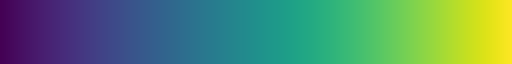

In [56]:
cmap

# Enhance plots from pandas using your Matplotlib skills

<AxesSubplot:xlabel='date'>

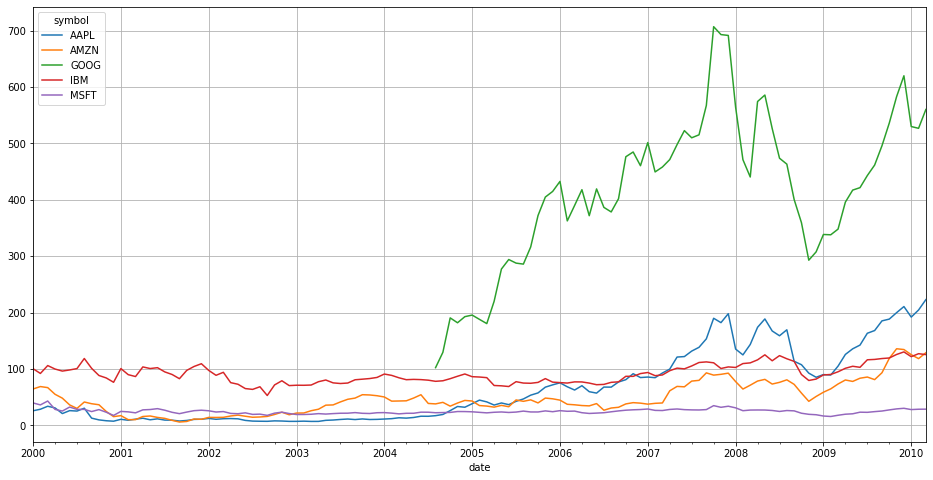

In [136]:
df = data.stocks()
df_pivot =  df.pivot(index='date', columns='symbol', values='price')
df_pivot.plot(figsize=(16,8), grid=True)

## Get axes object and annotate point

Text(0.5, 1.0, 'Stocks')

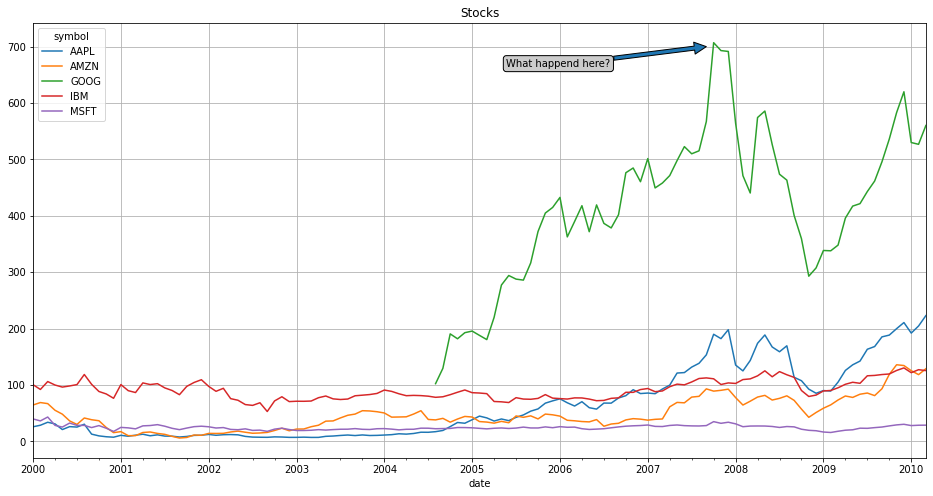

In [152]:
df = data.stocks()
df_pivot =  df.pivot(index='date', columns='symbol', values='price')
ax = df_pivot.plot(figsize=(16,8), grid=True)

bbox = dict(boxstyle="round", fc="0.8")
ax.annotate('What happend here?', ('2007-09-01',700),xytext=(-200,-20) ,textcoords='offset points', arrowprops=dict(width=4), bbox=bbox)
#t = ax.text(
#    2005, 400, "Direction", ha="center", va="center", rotation=45, size=15,
#    bbox=dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2))
ax.set_title('Stocks')


In [130]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

# Python visualization alternatives
**(Non complete list)**

* [Matplotlib](https://matplotlib.org/stable/index.html)
    - Oldest most established plotting library for Python
    - Pros:  
        - Control over every detail of plot
        - Can get started quickly for simple plots
        - Extensive documentation, examples, problem solutions available online
    - Cons: 
        - Need to control every detail of plot, sometimes
        - 2 API:s, sometimes confusing conventions
* [Plotly](https://plotly.com/python/)
    - Ambitious for-profit solution, but with open source, free, pythonon library
    - Pros:  
        - Comprahensive as well as easy to get started, there is a high-level plotly.express part of the library for convinience
        - There are also corresponding packages for javascript and R
        - They have a "Dash" solution for building dash-boards using plotly visualizations
    - Cons:  
        - Trying to sell their for profit "Enterprise" products 
* [Bokeh](https://bokeh.org/)
    - Interactive visualizations for the web (or inside Jupyter)
    - Pros:  
        - Focus on interactive web-based visualization
    - Cons:  
        - API has changed substantially over time
* [Altair](https://altair-viz.github.io/index.html)
    - Declarative plotting based on the Vega emerging web-standard
    - Pros:   
        - Once grasped the declaraive style is powerfull and intuitive
        - Tightly coupled to pandas DataFrames
    - Cons:   
        - The newest alternative, some functionallity might be lacking  
        - Depends on development of the Vega standard (also a strength)
* [Seaborn](https://seaborn.pydata.org/)
    - Statistical plotting, based on matplotlib
    - Pros:  
        - Advanced statistical plots in few lines of code
    - Cons
        - Not the same ambition to be a genral purpose plotting library as the others
        

# Visualization distribution options

# Extra

## Change pandas plotting backend

A fairly recent addeed feature in pandas is the ability to install and use other default plotting backends than matplotlib.  
Options like Bokeh and hvplot can add more interactive plots.

`pip install hvplot`  
`pip install pandas_bokeh`

In [13]:
pd.set_option("plotting.backend", "hvplot")

In [14]:
df.pivot(index='date', columns='symbol', values='price').plot(figsize=(16,8), grid=True)

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [15]:
pd.set_option("plotting.backend", "pandas_bokeh")

In [16]:
df.pivot(index='date', columns='symbol', values='price').plot(sizing_mode="scale_width")

Figure(id='1652', ...)

In [17]:
df2 = df.pivot(index='date', columns='symbol', values='price')
#df2.plot_bokeh(sizing_mode="scale_width")
df2.plot_bokeh(figsize=(1200,400))

Figure(id='2040', ...)

In [18]:
type(_)

bokeh.plotting.figure.Figure

# Misc

* Visualization options
    - Matplotlib
    - Plotly
    - Bokeh
    - Altair
* Plotly Basics
* Plotting directly from DataFrames
* Pandas style
* Extra
    - Distribution (e.g. Confluence) 
    - Dashboarding
    

In [59]:
import matplotlib.cbook as cbook
import numpy as np

In [61]:
arr = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

In [62]:
arr

array([('2004-08-19', 100.  , 104.06,  95.96, 100.34, 22351900, 100.34),
       ('2004-08-20', 101.01, 109.08, 100.5 , 108.31, 11428600, 108.31),
       ('2004-08-23', 110.75, 113.48, 109.05, 109.4 ,  9137200, 109.4 ),
       ...,
       ('2008-10-10', 313.16, 341.89, 310.3 , 332.  , 10597800, 332.  ),
       ('2008-10-13', 355.79, 381.95, 345.75, 381.02,  8905500, 381.02),
       ('2008-10-14', 393.53, 394.5 , 357.  , 362.71,  7784800, 362.71)],
      dtype=[('date', '<M8[D]'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('volume', '<i8'), ('adj_close', '<f8')])

In [63]:
price_data = arr.view(np.recarray)

In [64]:
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

In [65]:
price_data.adj_close[:-1]

array([639.62, 644.71, 650.75, 675.77, 675.82, 668.51, 674.6 , 679.23,
       694.77, 707.  , 703.21, 711.25, 725.65, 741.79, 732.94, 693.84,
       663.97, 632.07, 660.55, 641.68, 629.65, 633.63, 625.85, 648.54,
       660.52, 676.7 , 666.  , 673.57, 692.26, 697.  , 693.  , 681.53,
       684.16, 698.51, 715.26, 714.87, 718.42, 699.2 , 699.35, 694.05,
       689.96, 669.23, 673.35, 677.37, 689.69, 696.69, 700.73, 710.84,
       700.74, 702.53, 691.48, 685.19, 685.33, 657.  , 649.25, 631.68,
       653.2 , 646.73, 638.25, 653.82, 637.65, 615.95, 600.79, 600.25,
       584.35, 548.62, 574.49, 566.4 , 555.98, 550.52, 548.27, 564.3 ,
       515.9 , 495.43, 506.8 , 501.71, 504.95, 516.69, 521.16, 518.09,
       534.62, 532.25, 529.64, 508.95, 509.  , 502.86, 507.8 , 486.44,
       464.19, 472.86, 475.39, 471.18, 457.02, 444.6 , 447.7 , 432.7 ,
       433.35, 413.62, 439.84, 440.18, 443.01, 437.92, 419.87, 439.16,
       432.  , 433.55, 460.56, 450.78, 458.19, 444.08, 438.08, 440.47,
      

In [67]:
np.diff(price_data.adj_close)

array([ 5.090e+00,  6.040e+00,  2.502e+01,  5.000e-02, -7.310e+00,
        6.090e+00,  4.630e+00,  1.554e+01,  1.223e+01, -3.790e+00,
        8.040e+00,  1.440e+01,  1.614e+01, -8.850e+00, -3.910e+01,
       -2.987e+01, -3.190e+01,  2.848e+01, -1.887e+01, -1.203e+01,
        3.980e+00, -7.780e+00,  2.269e+01,  1.198e+01,  1.618e+01,
       -1.070e+01,  7.570e+00,  1.869e+01,  4.740e+00, -4.000e+00,
       -1.147e+01,  2.630e+00,  1.435e+01,  1.675e+01, -3.900e-01,
        3.550e+00, -1.922e+01,  1.500e-01, -5.300e+00, -4.090e+00,
       -2.073e+01,  4.120e+00,  4.020e+00,  1.232e+01,  7.000e+00,
        4.040e+00,  1.011e+01, -1.010e+01,  1.790e+00, -1.105e+01,
       -6.290e+00,  1.400e-01, -2.833e+01, -7.750e+00, -1.757e+01,
        2.152e+01, -6.470e+00, -8.480e+00,  1.557e+01, -1.617e+01,
       -2.170e+01, -1.516e+01, -5.400e-01, -1.590e+01, -3.573e+01,
        2.587e+01, -8.090e+00, -1.042e+01, -5.460e+00, -2.250e+00,
        1.603e+01, -4.840e+01, -2.047e+01,  1.137e+01, -5.090e

In [66]:
price_data.adj_close

array([639.62, 644.71, 650.75, 675.77, 675.82, 668.51, 674.6 , 679.23,
       694.77, 707.  , 703.21, 711.25, 725.65, 741.79, 732.94, 693.84,
       663.97, 632.07, 660.55, 641.68, 629.65, 633.63, 625.85, 648.54,
       660.52, 676.7 , 666.  , 673.57, 692.26, 697.  , 693.  , 681.53,
       684.16, 698.51, 715.26, 714.87, 718.42, 699.2 , 699.35, 694.05,
       689.96, 669.23, 673.35, 677.37, 689.69, 696.69, 700.73, 710.84,
       700.74, 702.53, 691.48, 685.19, 685.33, 657.  , 649.25, 631.68,
       653.2 , 646.73, 638.25, 653.82, 637.65, 615.95, 600.79, 600.25,
       584.35, 548.62, 574.49, 566.4 , 555.98, 550.52, 548.27, 564.3 ,
       515.9 , 495.43, 506.8 , 501.71, 504.95, 516.69, 521.16, 518.09,
       534.62, 532.25, 529.64, 508.95, 509.  , 502.86, 507.8 , 486.44,
       464.19, 472.86, 475.39, 471.18, 457.02, 444.6 , 447.7 , 432.7 ,
       433.35, 413.62, 439.84, 440.18, 443.01, 437.92, 419.87, 439.16,
       432.  , 433.55, 460.56, 450.78, 458.19, 444.08, 438.08, 440.47,
      